In [1]:
import numpy as np
import os, sys
from skimage import io
import matplotlib
from pprint import pprint
from matplotlib import pyplot as plt
from tqdm import tqdm
import neuroglancer
import cv2

#from PIL import Image
#Image.MAX_IMAGE_PIXELS = None

In [4]:
HOME = os.path.expanduser("~")
PATH = os.path.join(HOME, 'programming/pipeline_utility/src')
sys.path.append(PATH)
from lib.FileLocationManager import DATA_PATH, ROOT_DIR
from utilities.utilities_atlas import  singular_structures, average_shape, mirror_volume_v2

In [5]:
atlas_name = 'atlasV8'

In [26]:
structure = 'SC'
allen_color = 100
origins = []
volumes = []

VOLUME_PATH = '/net/birdstore/Active_Atlas_Data/data_root/atlas_data/atlasV7/structure'
filepath = os.path.join(VOLUME_PATH, f'{structure}.npy')
#volume = io.imread(midfilepath)
volume = np.load(filepath)
print(volume.dtype)
#volume[volume > 0] = allen_color
#volume = volume.astype(np.uint32)

volume = volume * color
volume = volume.astype(np.uint32)
volume[volume > 0] = allen_color
volume = volume.astype(np.uint32)
print(volume.shape, volume.dtype, np.amin(volume), np.amax(volume), np.mean(volume))

float64
(176, 238, 377) uint32 0 100 43.9313095626483


In [27]:
#volume = volume.reshape(volume.shape[0], volume.shape[1], volume.shape[2])
arr = volume.copy()
print('volume shape', arr.shape, arr.dtype, np.unique(arr, return_counts=False))

volume shape (176, 238, 377) uint32 [  0 100]


Text(0.5, 1.0, ' uint32')

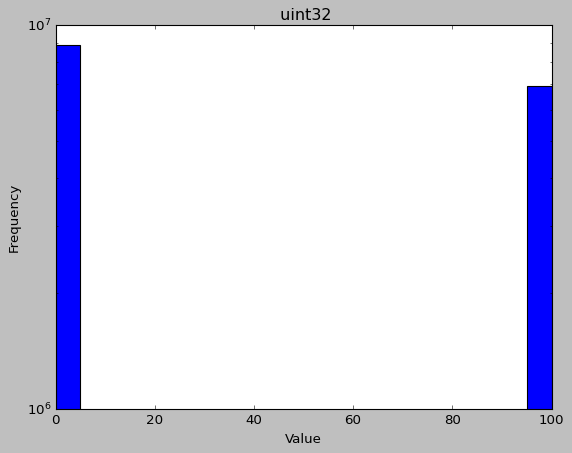

In [28]:
#volume[volume > 0] = 255
#volume[volume < 1] = 0
flat = arr.flatten()
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 6]
plt.hist(flat, bins=20, color='b')
plt.style.use('ggplot')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f' {arr.dtype}')

(176, 238, 377)


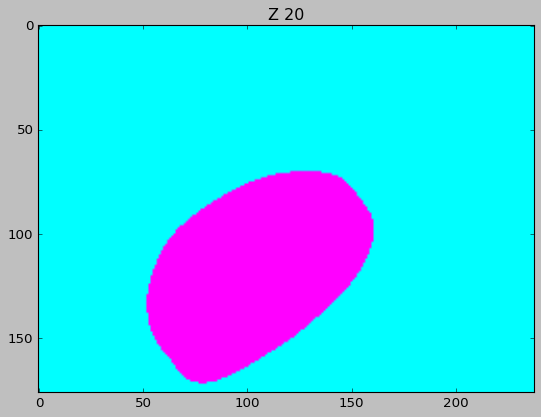

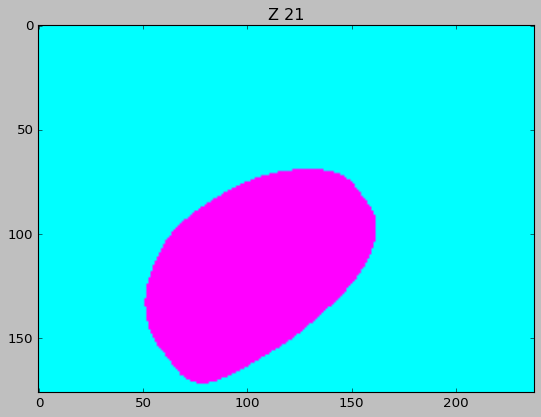

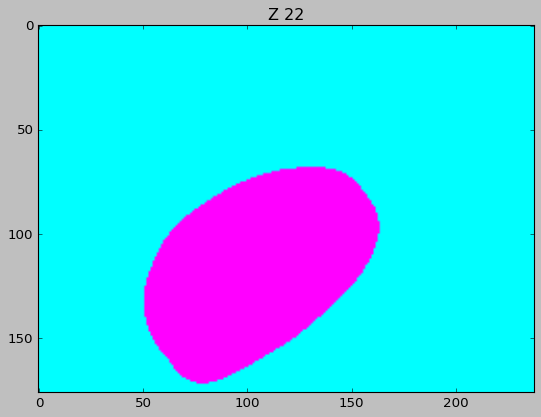

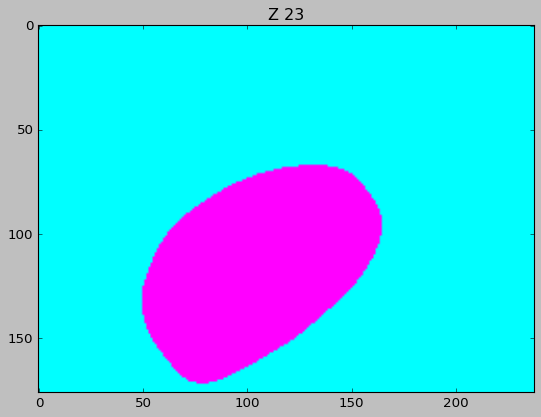

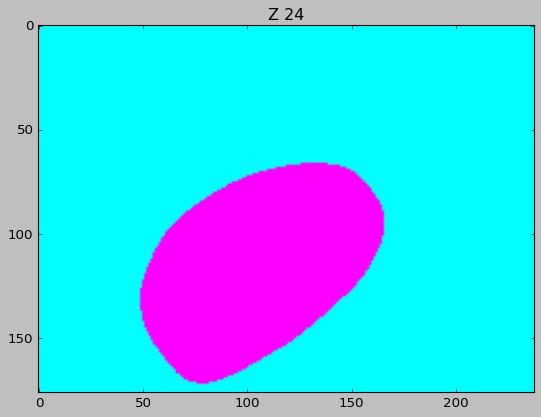

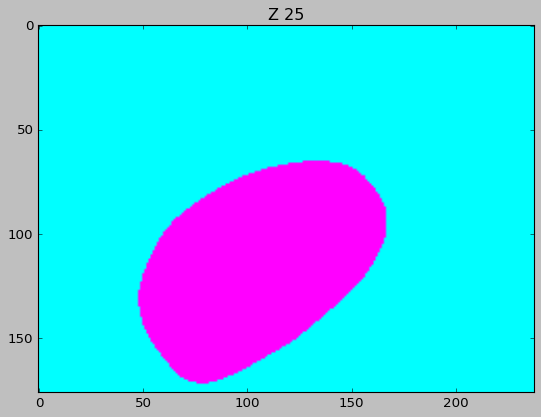

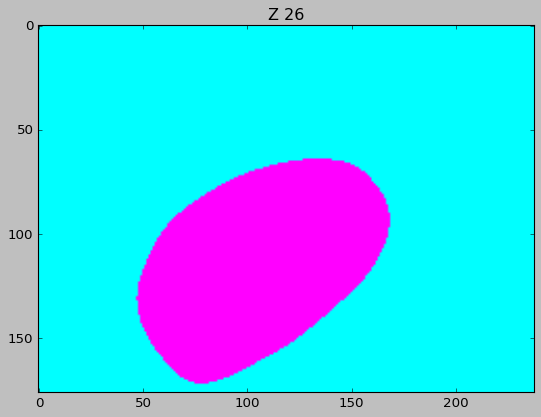

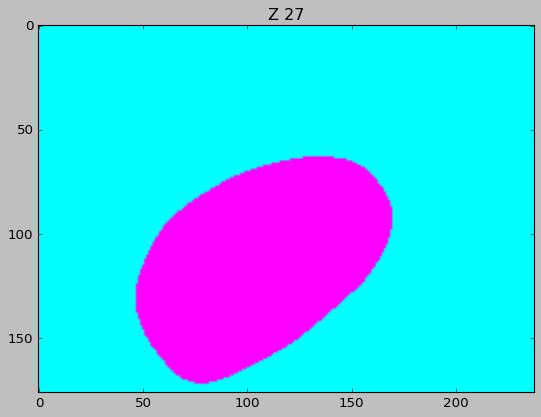

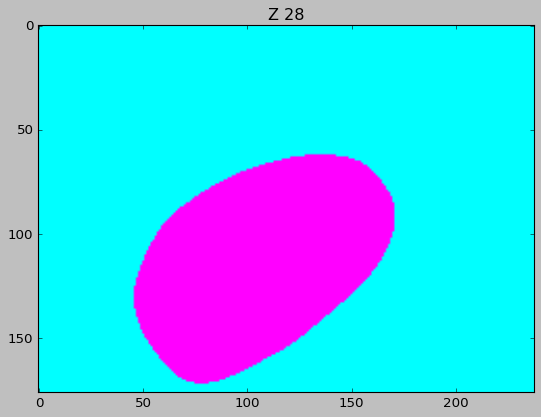

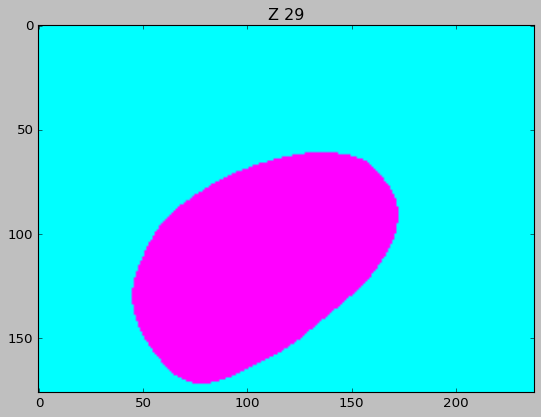

In [29]:
arr = volume.copy()
#arr = np.rot90(volume, axes=(2, 1))
#arr = np.rot90(arr, 3)
#arr = np.flip(arr, axis=1)    
print(arr.shape)
start = 20
end = start + 10
plt.style.use('classic')
for i in range(start, end):
    plt.title('Z {}'.format(i))
    plt.imshow(arr[:,:,i], cmap="cool")
    plt.show()

In [7]:
dimensions = neuroglancer.CoordinateSpace(
    names=['x', 'y', 'z'],
    units='nm',
    scales=[1000,1000,1000])

viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.dimensions = dimensions
    s.layers['Altas'] = neuroglancer.ImageLayer(
        source=neuroglancer.LocalVolume(
            data=volume,
            dimensions=dimensions,
            voxel_offset=(0, 0, 0),
        ),
        shader="""
#uicontrol float min slider(min=0, max=1, default=0)
#uicontrol float max slider(min=0, max=1, default=1)
#uicontrol float invert slider(min=0, max=1, default=0, step=1)
#uicontrol float brightness slider(min=-1, max=1)
#uicontrol float contrast slider(min=-3, max=3, step=0.01)
void main() {
  float pix_val = toNormalized(getDataValue());
  if(pix_val < min){
  	pix_val = 0.0;
  }
  if(pix_val > max){
    pix_val = 1.0;
  }

  if(invert==1.0){
  	  emitGrayscale((1.0 -(pix_val - brightness)) *
       exp(contrast));
  }
  else{
    emitGrayscale((pix_val + brightness) *
                  exp(contrast));
  }

}

""")
print(viewer)

http://127.0.0.1:39767/v/fcddb920b0dde88b6f4439d2be3324dcca24b6a5/


ERROR:tornado.application:Uncaught exception GET /neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/4,4,4/32,32,0/44,60,64 (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:39767', method='GET', uri='/neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/4,4,4/32,32,0/44,60,64', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/tornado/web.py", line 1713, in _execute
    result = await result
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/server.py", line 325, in get
    data, content_type = await asyncio.wrap_future(
  File "/usr/lib/python3.10/concurrent/futures/thread.py", line 58, in run
    result = self.fn(*self.args, **self.kwargs)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/local_volume.py", line 185, in get_encoded_subvolu

  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/local_volume.py", line 185, in get_encoded_subvolume
    subvol = downsample.downsample_with_averaging(subvol, downsample_factor)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/downsample.py", line 30, in downsample_with_averaging
    counts = np.zeros(output_shape, np.int)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/numpy/__init__.py", line 284, in __getattr__
    raise AttributeError("module {!r} has no attribute "
AttributeError: module 'numpy' has no attribute 'int'
ERROR:tornado.application:Uncaught exception GET /neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/4,4,4/0,0,0/32,32,64 (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:39767', method='GET', uri='/neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/4,4,4/0,0,0/32,32,64', version='HTTP/1.1'

  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/local_volume.py", line 185, in get_encoded_subvolume
    subvol = downsample.downsample_with_averaging(subvol, downsample_factor)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/downsample.py", line 30, in downsample_with_averaging
    counts = np.zeros(output_shape, np.int)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/numpy/__init__.py", line 284, in __getattr__
    raise AttributeError("module {!r} has no attribute "
AttributeError: module 'numpy' has no attribute 'int'
ERROR:tornado.application:Uncaught exception GET /neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/2,2,2/0,64,64/64,119,128 (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:39767', method='GET', uri='/neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/2,2,2/0,64,64/64,119,128', version='H

  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/local_volume.py", line 185, in get_encoded_subvolume
    subvol = downsample.downsample_with_averaging(subvol, downsample_factor)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/downsample.py", line 30, in downsample_with_averaging
    counts = np.zeros(output_shape, np.int)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/numpy/__init__.py", line 284, in __getattr__
    raise AttributeError("module {!r} has no attribute "
AttributeError: module 'numpy' has no attribute 'int'
ERROR:tornado.application:Uncaught exception GET /neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/4,4,4/0,32,64/32,60,95 (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:39767', method='GET', uri='/neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/4,4,4/0,32,64/32,60,95', version='HTTP/

ERROR:tornado.application:Uncaught exception GET /neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/2,2,2/64,0,128/88,64,189 (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:39767', method='GET', uri='/neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/2,2,2/64,0,128/88,64,189', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/tornado/web.py", line 1713, in _execute
    result = await result
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/server.py", line 325, in get
    data, content_type = await asyncio.wrap_future(
  File "/usr/lib/python3.10/concurrent/futures/thread.py", line 58, in run
    result = self.fn(*self.args, **self.kwargs)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/local_volume.py", line 185, in get_encoded_sub

  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/local_volume.py", line 185, in get_encoded_subvolume
    subvol = downsample.downsample_with_averaging(subvol, downsample_factor)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/neuroglancer/downsample.py", line 30, in downsample_with_averaging
    counts = np.zeros(output_shape, np.int)
  File "/usr/local/share/pipeline/lib/python3.10/site-packages/numpy/__init__.py", line 284, in __getattr__
    raise AttributeError("module {!r} has no attribute "
AttributeError: module 'numpy' has no attribute 'int'
ERROR:tornado.application:Uncaught exception GET /neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/2,2,2/64,0,0/88,64,64 (127.0.0.1)
HTTPServerRequest(protocol='http', host='127.0.0.1:39767', method='GET', uri='/neuroglancer/npz/fcddb920b0dde88b6f4439d2be3324dcca24b6a5.1fc3f921a0e8fac45a824f2857bd8bb9b41242df/2,2,2/64,0,0/88,64,64', version='HTTP/1.